In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [46]:
from sklearn._config import get_config, set_config
get_config()["print_changed_only"]
True

True

In [47]:
set_config(print_changed_only=False)

In [9]:
data={
    "age": np.random.randint(40,85,size=100),
    "hypertention": np.random.randint(0,2, size=100),
    "h_disease": np.random.randint(0,2,size=100),
    "dibaetic": np.random.randint(0,2, size=100)
}
df=pd.DataFrame(data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
df.sample(4)

,age,hypertention,h_disease,dibaetic
53,71,1,1,0
98,56,1,0,1
26,66,0,0,1
58,62,1,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   age           100 non-null    int64
 1   hypertention  100 non-null    int64
 2   h_disease     100 non-null    int64
 3   dibaetic      100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


In [13]:
df.describe()

,age,hypertention,h_disease,dibaetic
count,100.000000,100.000000,100.000000,100.000000
mean,60.880000,0.490000,0.500000,0.500000
std,12.859207,0.502418,0.502519,0.502519
min,40.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.000000,0.000000
50%,61.000000,0.000000,0.500000,0.500000
75%,72.250000,1.000000,1.000000,1.000000
max,84.000000,1.000000,1.000000,1.000000


In [14]:
df.isnull().sum()

age             0
hypertention    0
h_disease       0
dibaetic        0
dtype: int64

<IPython.core.display.Javascript object>

<Axes: >

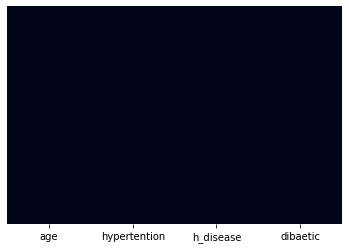

In [17]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

<IPython.core.display.Javascript object>

/Users/mohammad.aval/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/mohammad.aval/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/mohammad.aval/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/mohammad.aval/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/mohammad.aval/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/mohammad.aval/miniconda

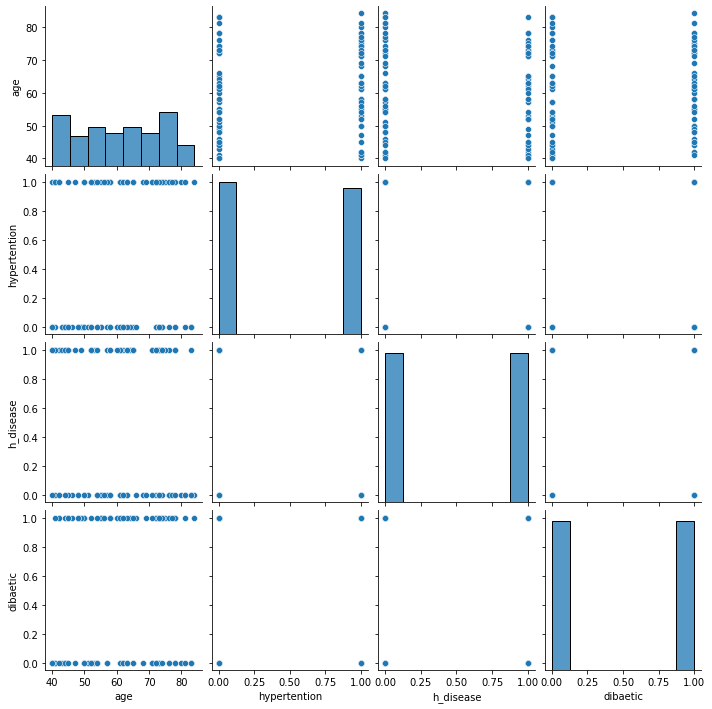

In [19]:
sns.pairplot(df, palette='mako')

<IPython.core.display.Javascript object>

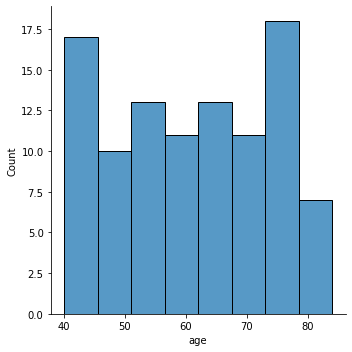

In [20]:
sns.displot(data=df, x='age')

<IPython.core.display.Javascript object>

<Axes: xlabel='dibaetic', ylabel='count'>

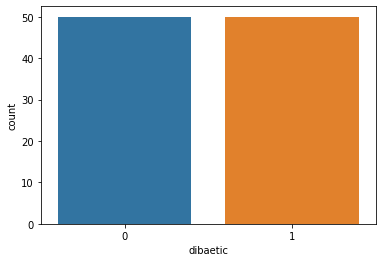

In [21]:
sns.countplot(data=df, x='dibaetic')

In [25]:
df.columns

Index(['age', 'hypertention', 'h_disease', 'dibaetic'], dtype='object')

In [26]:
X=df.drop('dibaetic', axis=1)
y=df['dibaetic']

In [28]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15, random_state=1234)

<IPython.core.display.Javascript object>

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
my_model2=DecisionTreeClassifier()
my_model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
#Prediction
pred=my_model2.predict(X_test)
pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1])

In [35]:
from sklearn.metrics import confusion_matrix, classification_report 

In [36]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1 5]
 [7 2]]
              precision    recall  f1-score   support

           0       0.12      0.17      0.14         6
           1       0.29      0.22      0.25         9

    accuracy                           0.20        15
   macro avg       0.21      0.19      0.20        15
weighted avg       0.22      0.20      0.21        15



In [48]:
# Using Random Forest
from sklearn.ensemble import RandomForestClassifier

In [49]:
model3=RandomForestClassifier(n_estimators=150)

In [50]:
model3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=150, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [41]:
pred2=model3.predict(X_test)

In [43]:
acc=model3.score(X_test, y_test)
acc

0.26666666666666666

In [44]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1 5]
 [7 2]]
              precision    recall  f1-score   support

           0       0.12      0.17      0.14         6
           1       0.29      0.22      0.25         9

    accuracy                           0.20        15
   macro avg       0.21      0.19      0.20        15
weighted avg       0.22      0.20      0.21        15

